In [1]:
import numpy as np 
import sep 

In [2]:
import astropy
from astropy.io import fits 
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = [10., 8.]

In [3]:
fdata_hlsp = "/Users/admin/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

hdu = fits.open(fdata_hlsp)

data = hdu[0].data 

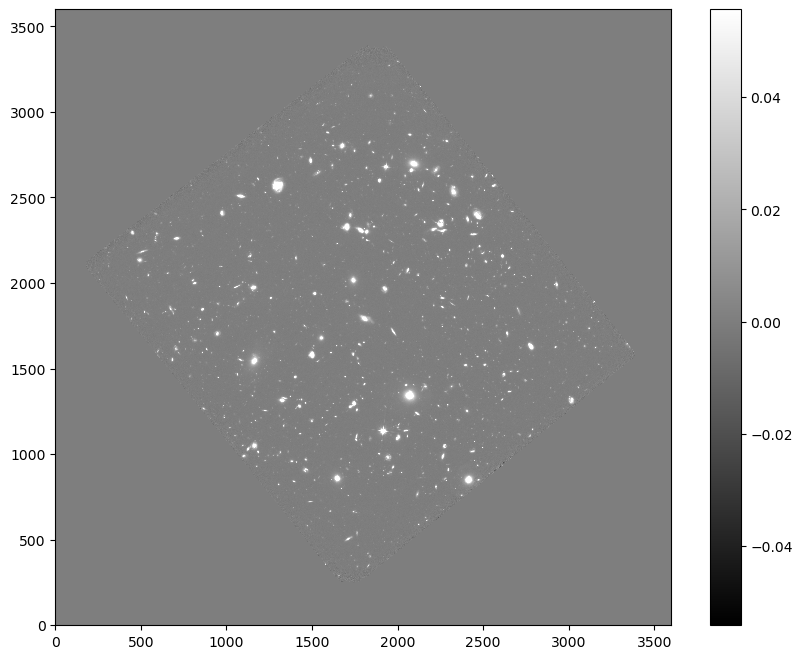

In [4]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [5]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

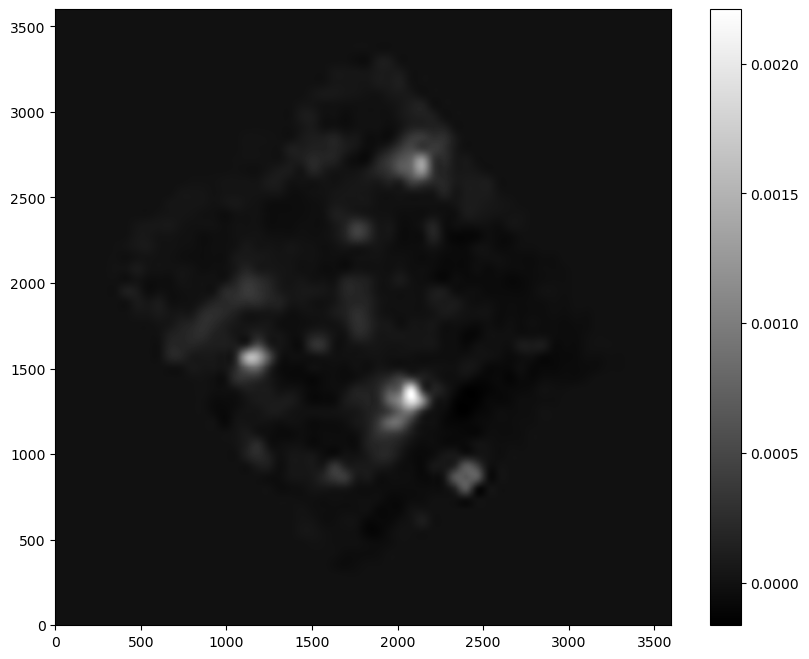

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

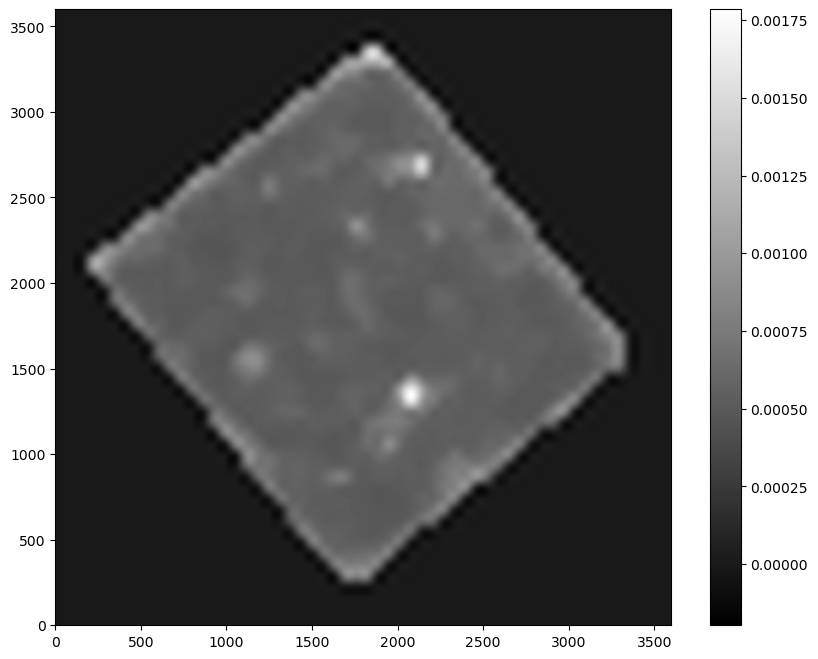

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
# subtract the background
data_sub = data - bkg


In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [13]:
# how many objects were detected
len(objects)

8640

In [14]:
print(objects['flux'])

[0.03645862 0.04817118 0.01450479 ... 0.12290338 0.02866273 0.01463414]


In [15]:
flux = objects['flux']

Now i will histogram the fluxes

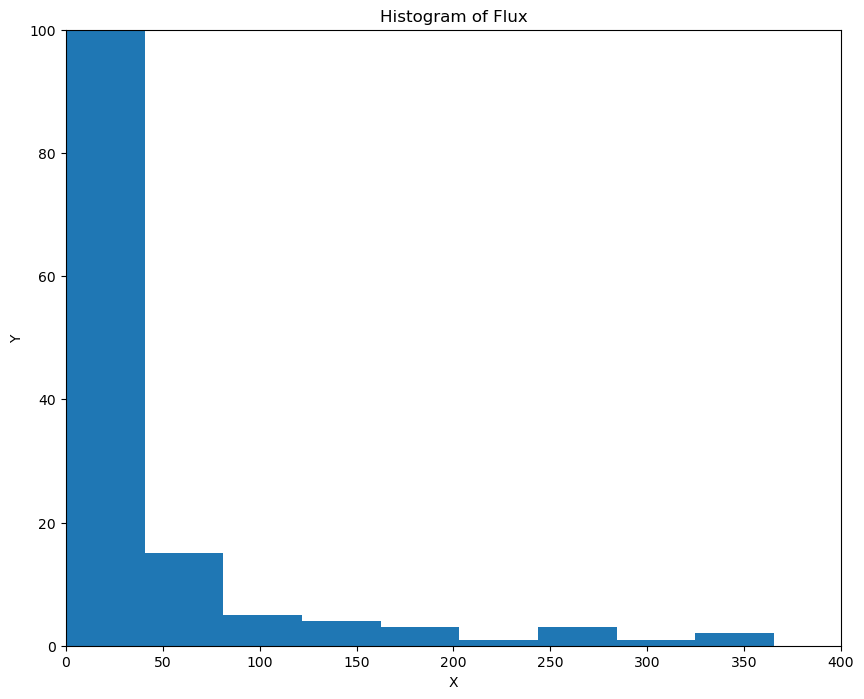

In [16]:

plt.hist(flux, bins = 30)
plt.xlim(xmin=0, xmax= 400)
plt.ylim(ymin=0, ymax= 100)
plt.title("Histogram of Flux")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [17]:
fdata_hlsp1 = "/Users/admin/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"

hdu_1 = fits.open(fdata_hlsp1)

fdata_hlsp2 = "/Users/admin/downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

hdu_2 = fits.open(fdata_hlsp2)

#getting the data 
data_1 = hdu_1[0].data
data_2 = hdu_2[0].data 

In [18]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max-d_min)
s = 1.0 - v 

NameError: name 'd_log' is not defined